<a href="https://colab.research.google.com/github/Rytis-J/Dexcom-Follow/blob/main/insurance_cost_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [183]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy

In [184]:
insurance_data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [185]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [186]:
insurance_data = pd.get_dummies(insurance_data)
insurance_data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [187]:
try:
  y = insurance_data.pop("charges")
except:
  None

y_split_size = int(len(y)/100*80)
y_train = tf.constant(y[:y_split_size])
y_test = tf.constant(y[y_split_size:])

X = insurance_data
X_split_size = int(len(X)/100*80)
X_train = tf.constant(X[:X_split_size])
X_test = tf.constant(X[X_split_size:])


In [188]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=["mae"]
)

history = model.fit(X_train, y_train, epochs=200, verbose=0)

In [189]:
y_predictions = model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 2354.2183 - mae: 2354.2183


Text(0.5, 0, 'epochs')

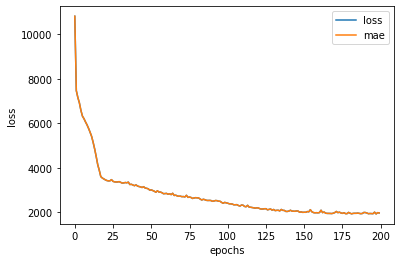

In [190]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")